**LabDS03b**

Considerieng several variables corresponding to international indicator. The purpose of this study is identifying the best model to predict if a country is a good country in what concerns Co2 emissions.



1. Import data 

Import data and create new varible (discretize variable)

In [1]:
import pandas as pd
import numpy as np

In [2]:
url='Mundo94Var.xls'
df=pd.read_excel(url)

In [5]:
#classificar os países em dois tipos de países 
XY=df[['CO2 emissions (metric tons per capita)',
        'Urban population (% of total population)',
        'Population density (people per sq. km of land area)',
        'Secure Internet servers (per 1 million people)',
        'Mobile cellular subscriptions (per 100 people)',
        'Life expectancy at birth, total (years)',
        'Access to electricity (% of population)'
       ]]

XY=XY.dropna()

#fazer a descretização - vou dividir os meus dados; o Y ou é 0 ou é 1
#a segunda parte = fronteira - se fôr abaixo da fronteira é 0, se fôr acima da fronteira é 1
Y=np.digitize(XY['CO2 emissions (metric tons per capita)'],[np.average(XY['CO2 emissions (metric tons per capita)'])])

#eliminar a variável porque agora passa de feature a target
Xfeatures=XY.drop(['CO2 emissions (metric tons per capita)'],axis=1)

Y

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0])

2. Standardize data

In [4]:
#subtrair a média e dividir pelo desvio padrão
from sklearn.preprocessing import StandardScaler
standardizer=StandardScaler()
X=standardizer.fit_transform(Xfeatures)

3. Model Selection

All the models are compared. 

In [5]:
#selecionar aqueles que quero entre vários modelos 
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#criar uma lista constituida por todos os modelos (tupple)
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

#criar outra lista dos resultados e utilizar a análise de accurancy
results = []
names = []
scoring = 'accuracy' #exatidão
#seed = 7

for name, model in models:
    kfold = model_selection.KFold(n_splits=10) #kfold - vou dividir a minha amostra em 10 partes e vou ter uma componente que vai ser treino e outra que será teste
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring) #poder analisar a minha amostra podendo dividi-la em várias partes (ex. dividir em teste e em treino)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

#em termos de accurancy o melhor é o KNN, o segundo SVM e o terceiro NB

KNN: 0.804678 (0.075457)
NB: 0.745322 (0.078136)
SVM: 0.799123 (0.079186)


4. Plot using box plot

All ths models are compared.

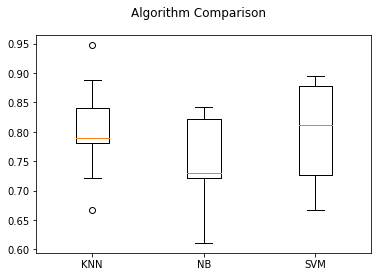

In [21]:
#permite fazer a comparação com média e desvio padrão
import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

5. Best model selected

Beste model was selected and fitted

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3) #vou buscar 30% para teste e 70% para treino - split da amostra

model = KNeighborsClassifier()
result=model.fit(X_train,y_train) #fit do modelo

y_pred = model.predict(X_test) #fiz o meu modelo com base nos dados de treino e vou utilizar o modelo com os dados de teste


the confusion matrix calculated


In [9]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[29,  5],
       [ 6, 16]], dtype=int64)

confusion matrix plot

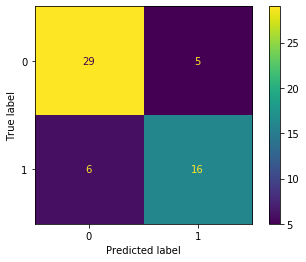

In [10]:
#forma mais apelativa de apresentar os dados apresentados em cima
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test) 

#relaciona os valores que nós prevemos com os valores reais - 29 casos com 0 e 15 casos com 1 nós acertámos 